In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import random
sys.path.append('../..')
from select_sensor import SelectSensor
from utility import generate_intruders
plt.rcParams['font.size'] = 25
filename = '{}-{}-{}.txt'

In [5]:
num_intru = [1, 3, 5, 7, 10]

mean1 = []  # time for ours procedure 1
mean2 = []  # time for ours procedure 2
for num in num_intru:
    time = np.loadtxt(filename.format(num, 'ours', 'time'), delimiter=',')
    mean1.append(time[0])
    mean2.append(time[1])
    
mean3 = []  # time for splot
for num in num_intru:
    time = np.loadtxt(filename.format(num, 'splot', 'time'), delimiter=',')
    mean3.append(time)

mean4 = []  # time for cluster
for num in num_intru:
    time = np.loadtxt(filename.format(num, 'cluster', 'time'), delimiter=',')
    mean4.append(time)

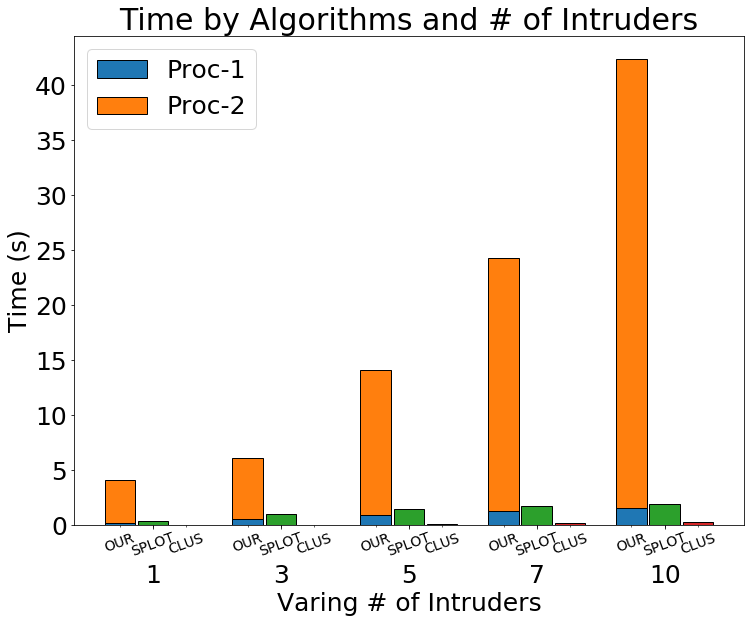

In [6]:
plt.figure(figsize=(12, 9))

N     = 5
ind   = np.arange(N)    # the x locations for the groups
width = 0.24            # the width of the bars: can also be len(x) sequence

pos1 = ind-width-0.02   # position of algo-1's bar
pos2 = ind              # position of algo-2's bar
pos3 = ind+width+0.02   # position of algo-3's bar

p1 = plt.bar(pos1, mean1, width, edgecolor='black', label='Proc-1')
p2 = plt.bar(pos1, mean2, width, edgecolor='black', bottom=mean1, label='Proc-2')

p3 = plt.bar(pos2, mean3, width, edgecolor='black')

p4 = plt.bar(pos3, mean4, width, edgecolor='black')

minor_pos = np.concatenate((pos1, pos2, pos3))
minor_lab = ['OUR']*5 + ['SPLOT']*5 + ['CLUS']*5
ax = plt.gca()
ax.set_xticks(minor_pos, minor=True)
ax.set_xticklabels(minor_lab, minor=True, fontsize=14, rotation=20)

plt.xticks(ind, ('1', '3', '5', '7', '10'))
plt.xlabel('Varing # of Intruders')
ax.tick_params(axis='x', which='major', pad=35)

plt.legend()
plt.ylabel('Time (s)')
plt.title('Time by Algorithms and # of Intruders')
plt.savefig('varyIntruder-time.png')